In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

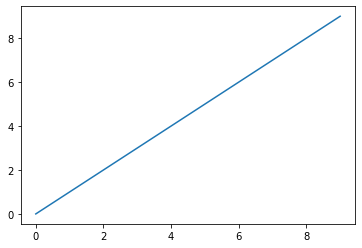

In [3]:
data=np.arange(10)
plt.plot(data)

## 1. figure와 서브플롯

In [4]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
# add_subplot을 사용해 최소하나이상의 subplots 생성하기
ax1=fig.add_subplot(2,2,1) # 4개의 서브플롯중에서 첫번째를 선택하겠다는 의미

In [6]:
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

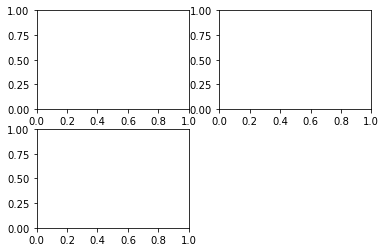

In [7]:
fig

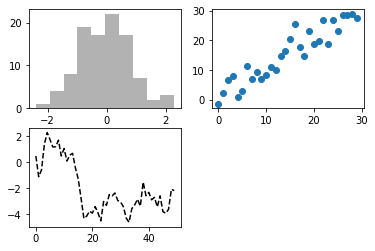

In [8]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

# 각각 인스턴스 메서드를 호출하여 다른 빈 서브플롯에 직접 그래프를 그린다.
ax1.hist(np.random.randn(100),color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(),'k--') #'k--': 검은 점선을 그리기위한 스타일 옵션

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

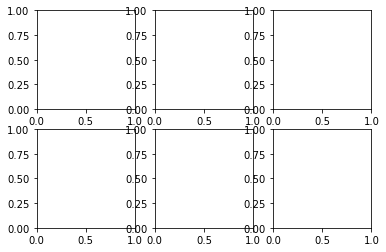

In [9]:
# 서브플롯을 편리하게 생성하게 해주는 메서드 (plt.subplots())
# numpy 배열과 서브플롯 객체를 새로 생성하여 반환
fig,axes=plt.subplots(2,3)
axes

In [10]:
# axes 배열은 axes[0,1]처럼 2차원 배열로 쉽게 색인할 수 있다.
# sharex와 sharey를 사용해서 서브플롯이 같은 x축 혹은 y축을 가지게 한다.

* 서브플롯 간의 간격 조절하기
* Figure 객체의 subplots_adjust 메서드 사용

In [11]:
#subplots_adjust(left=None,bottom=None,right=None,top=None,
#               wspace=None,hspace=None) 

# wspace/hspace는 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율을 조절한다.

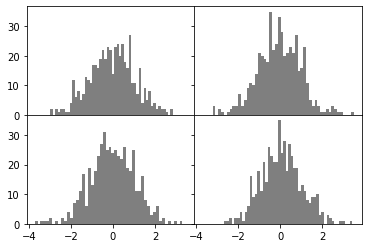

In [12]:
#서브플롯간의 간경을 주지 않은 그래프를 생성하는 코드
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
        
plt.subplots_adjust(wspace=0,hspace=0)

## 2.색상,마커,선 스타일

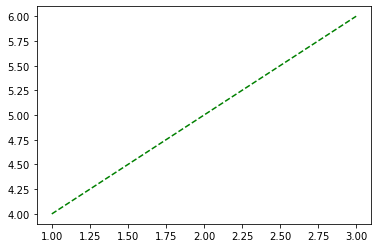

In [13]:
# 녹색 점선으로 그린 x대y 그래프
plt.plot([1,2,3],[4,5,6],'g--')

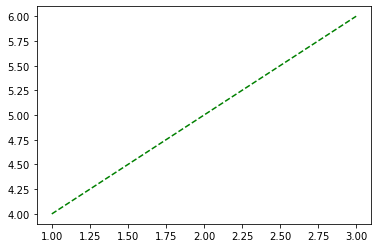

In [14]:
# 좀 더 명시적으로 표현하기
plt.plot([1,2,3],[4,5,6],linestyle='--',color='g')

* 마커추가

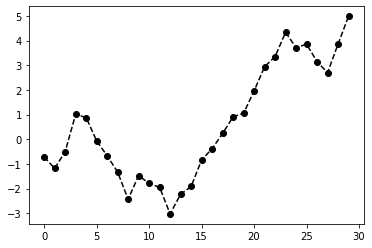

In [15]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')

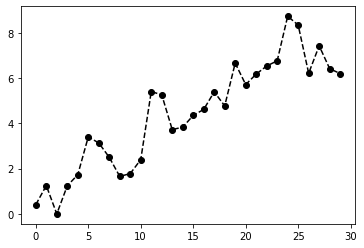

In [16]:
# 좀더 명시적인 표현
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

In [17]:
data=np.random.randn(30).cumsum()

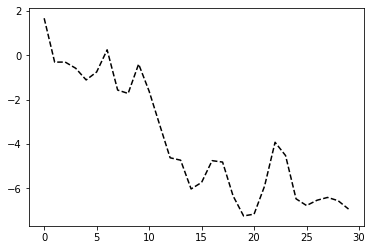

In [18]:
plt.plot(data,'k--')

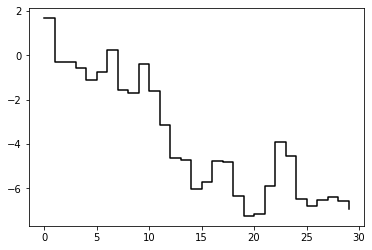

In [19]:
# drawstyle옵션 적용
plt.plot(data,'k-',drawstyle='steps-post')

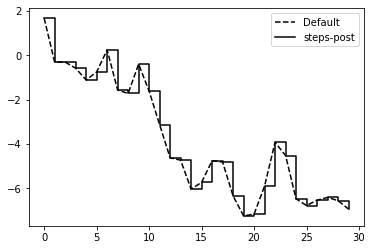

In [20]:
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')  #legned와 label을 이용해서 범례생성

## 3. 눈금,라벨,범례

* 제목,축,이름,눈금 이름 설정하기

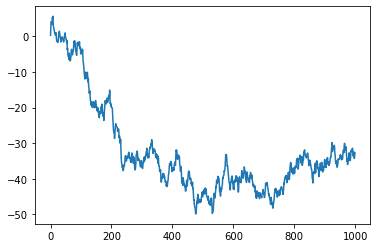

In [21]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [22]:
# x축의 눈금변경
# set_xticks와 set_xticklabels 메서드 사용
# set_xticks-전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정한다.
# set_xticks-다른 눈금 이름을 지정

Text(0.5, 0, 'Stages')

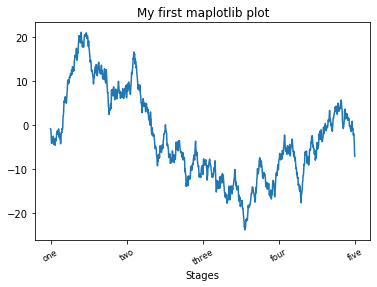

In [23]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'],
                       rotation=30,fontsize='small')
ax.set_title('My first maplotlib plot')
ax.set_xlabel('Stages')

In [24]:
# x대신 y를 써서 같은 과정을 y축에 대해 진행할 수 있다.
# axes클래스는 플롯의 속성을 설정할 수 있도록 set메서드를 제공한다.

props={'title':'My first matplolib plot',
      'xlabel':'Stages'}
ax.set(**props)

[Text(0.5, 1.0, 'My first matplolib plot'),
 Text(0.5, 17.200000000000003, 'Stages')]

* 범례 추가하기

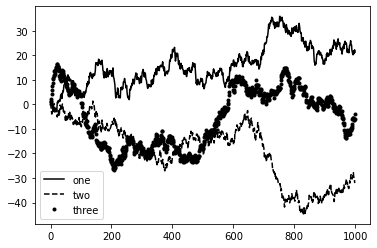

In [25]:
# label인자 넘기기
from numpy.random import randn
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')

# ax.legend()나 plt.legend()를 실행했을 떄 자동으로 범례가 생성된다.
ax.legend(loc='best')  # 범례를 그래프에서 어디에 위치시킬지 지정해주는 인자

## 4. 주석과 그림 추가하기

* 일반적인 그래프에 추가적으로 글자난 화살표 혹은 다른 도형으로 자기만의 주석을 그리고 싶은 경우 사용
* 주석과 글자는 text,arrow,annotate 함수를 이용해서 추가할 수 있다.

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

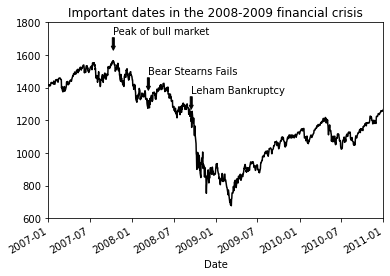

In [26]:
from datetime import datetime
import pandas as pd
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

data=pd.read_csv('spx.csv',index_col=0,parse_dates=True)
spx=data['SPX']
spx.plot(ax=ax,style='k-')

crisis_data=[
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Leham Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+75), #x,y 좌표를 지정한 위치에 레이블을 추가
    xytext=(date,spx.asof(date)+225),
    arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
    horizontalalignment='left',verticalalignment='top')
    
#2007-2010구간으로 확대
ax.set_xlim(['1/1/2007','1/1/2011']) #그래프의 시작과 끝 설정
ax.set_ylim([600,1800]) # 그래프의 시작과 끝 설정
ax.set_title('Important dates in the 2008-2009 financial crisis') # 제목설정

## 5.그래프를 파일로 저장하기

* plt.savefig사용
- figure을 SVG 포맷으로 저장하기 (plt.savefig('figpath.svg'), .svg대신 .pdf를 입력하면 pdf파일을 얻게된다.